## Import Libraries

In [295]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

## Import Training Dataset

In [296]:
# read in training dataset
df = pd.read_csv('datasets/train.csv')
# display first 5 rows to evaluate
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Initial EDA

In [297]:
# evaluate shape of dataframe
df.shape

(2051, 81)

In [298]:
# evaluate features of dataframe
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [299]:
# evaluate null values and data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [300]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


## Data Cleaning

In [301]:
# copy original dataframe
df_old = df.copy()

In [302]:
# Create a dataframe of all features with null values for better inspection of all columns
nulls = pd.DataFrame({key:value for key,value in df_old.items() if df_old[key].isnull().sum() > 0})
# display first 5 rows 
nulls.head()

,Lot Frontage,Alley,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,NaN,NaN,BrkFace,289.0,TA,TA,No,GLQ,533.0,Unf,...,Attchd,1976.0,RFn,2.0,475.0,TA,TA,NaN,NaN,NaN
1,43.0,NaN,BrkFace,132.0,Gd,TA,No,GLQ,637.0,Unf,...,Attchd,1997.0,RFn,2.0,559.0,TA,TA,NaN,NaN,NaN
2,68.0,NaN,None,0.0,TA,TA,No,GLQ,731.0,Unf,...,Detchd,1953.0,Unf,1.0,246.0,TA,TA,NaN,NaN,NaN
3,73.0,NaN,None,0.0,Gd,TA,No,Unf,0.0,Unf,...,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,NaN,NaN,NaN
4,82.0,NaN,None,0.0,Fa,Gd,No,Unf,0.0,Unf,...,Detchd,1957.0,Unf,2.0,484.0,TA,TA,NaN,NaN,NaN


## Null Values

In [303]:
# Check total nulls in Lot Frontage
nulls['Lot Frontage'].isnull().sum()

330

In [304]:
# evaluate value counts of Lot Frontage: linear ft of street connected to property
nulls['Lot Frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
119.0      1
117.0      1
137.0      1
22.0       1
195.0      1
Name: Lot Frontage, Length: 118, dtype: int64

In [305]:
# Create function to fill null values
def convert_null(x, value):
    x.fillna(value, inplace=True)
    return x.value_counts()

In [306]:
# Execute function to convert null values in lot frontage to 0
convert_null(df_old['Lot Frontage'],0)

0.0      330
60.0     179
70.0      96
80.0      94
50.0      90
        ... 
115.0      1
22.0       1
116.0      1
138.0      1
137.0      1
Name: Lot Frontage, Length: 119, dtype: int64

In [307]:
# Evaluate total null values in column 'Alley'
df_old['Alley'].isnull().sum()

1911

In [308]:
# Evaluate values of alley; null values represent no alley
df_old['Alley'].value_counts(normalize=True)

Grvl    0.607143
Pave    0.392857
Name: Alley, dtype: float64

In [309]:
# Execute function to convert null values to string 'NA' to indicate no alley
convert_null(df_old['Alley'], 'NA')

NA      1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

In [310]:
# total null values in Mas Vnr Type
df_old['Mas Vnr Type'].isnull().sum()

22

In [311]:
# evaluate value counts for Masonry Veneer Type; null values represent no masonry veneer
df_old['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [312]:
# Function, convert nulls to 'None' value
convert_null(df_old['Mas Vnr Type'], 'None')

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [313]:
# evaluate value counts of next feature
df_old['Mas Vnr Area'].value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
210.0       9
         ... 
576.0       1
796.0       1
573.0       1
372.0       1
428.0       1
Name: Mas Vnr Area, Length: 373, dtype: int64

In [314]:
# evaluate total null values
df_old["Mas Vnr Area"].isnull().sum()

22

In [315]:
# function, convert to 0
convert_null(df_old['Mas Vnr Area'], 0)

0.0      1238
120.0      11
176.0      10
200.0      10
210.0       9
         ... 
576.0       1
796.0       1
573.0       1
372.0       1
428.0       1
Name: Mas Vnr Area, Length: 373, dtype: int64

### This is repetative, let's automate this with function!

In [316]:
#create list for all ordinal features with null values
null_ordinal = [df_old['Bsmt Cond'], df_old['Bsmt Qual'], df_old['Bsmt Exposure'], df_old['BsmtFin Type 1'], df_old['BsmtFin Type 2'], 
          df_old['Fireplace Qu'],
          df_old['Garage Type'], df_old['Garage Finish'], df_old['Garage Qual'], df_old['Garage Cond'],
          df_old['Pool QC'], df_old['Fence'], df_old['Misc Feature']]

#create list for all numerical features with null values
null_numerical = [df_old['BsmtFin SF 1'], df_old['BsmtFin SF 2'], df_old['Bsmt Unf SF'], df_old['Total Bsmt SF'], df_old['Bsmt Full Bath'], df_old['Bsmt Half Bath'],
           df_old['Garage Yr Blt'], df_old['Garage Cars'], df_old['Garage Area']]

#define function to fill null values for list of ordinal features and list of numerical features
def group_convert_nulls(lst_ord,lst_num):
    for x in lst_ord:
        convert_null(x, 'NA')
    for x in lst_num:
        convert_null(x, 0)

In [317]:
# execute function
group_convert_nulls(null_ordinal, null_numerical)

In [318]:
# check function performance
df_old.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

## EDA

In [319]:
# Convert all columns to lowercase and replace spaces in column names.
df_old.columns = df_old.columns.str.lower().str.replace(' ', '_')
df_old.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [320]:
# Create a dataframe of all features with numerical data
numericals = pd.DataFrame({key:value for key,value in df_old.items() if df_old[key].dtype != 'O'})
# Display first 5 rows
numericals.head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [321]:
# Create a dataframe of all features with categorical data
categoricals = pd.DataFrame({key:value for key,value in df_old.items() if df_old[key].dtype == 'O'})
# Display first 5 rows
categoricals.head()

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,...,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD


In [322]:
# Add saleprice column to categoricals
categoricals['saleprice'] = numericals['saleprice']

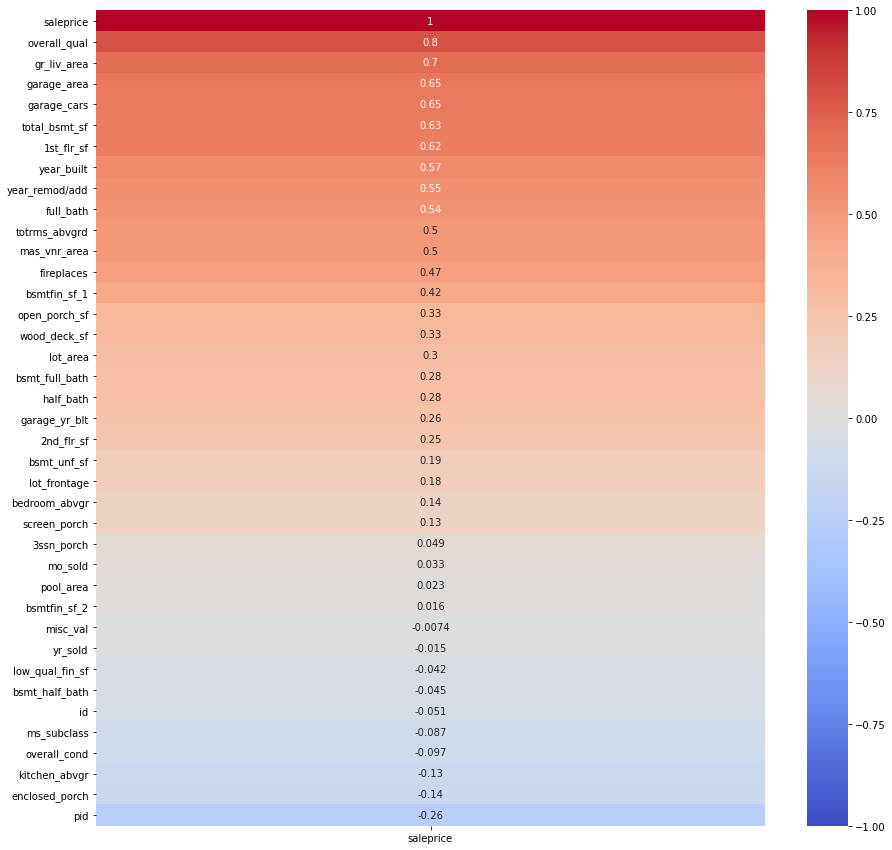

In [323]:
# Heat map of numerical data with saleprice
plt.style.use('seaborn-bright')
fig, ax = plt.subplots(figsize=(15, 15))
plt.fontsize = 27
sns.heatmap(numericals.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);

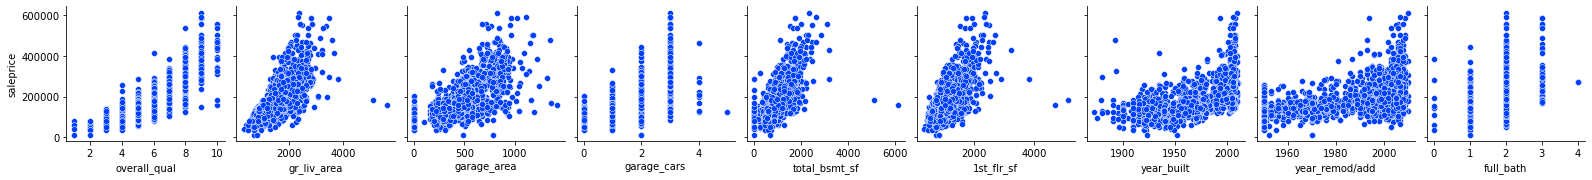

In [324]:
# Create pair plot to evaluate multiple features with high correlation on heatmap
plt.style.use('seaborn-bright');
sns.pairplot(numericals,
             x_vars=['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath'],
             y_vars= ['saleprice']);

#### Neighborhood

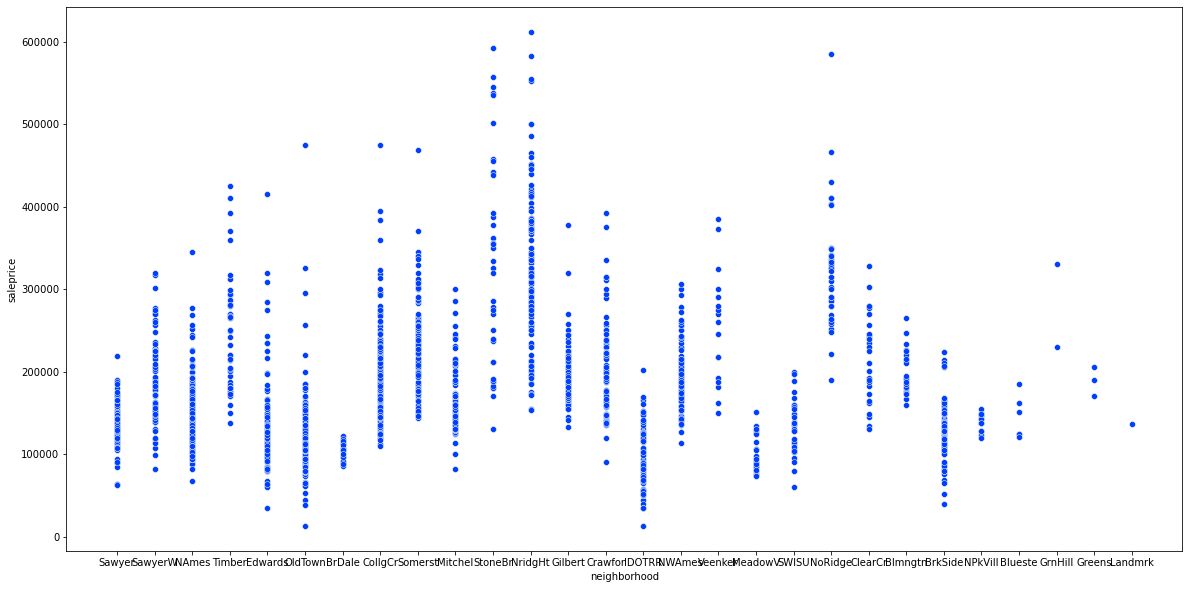

In [325]:
# Visualize first feature of interest: Nighborhood
plt.figure(figsize=(20,10))
sns.scatterplot(data=categoricals, x='neighborhood', y='saleprice');

In [326]:
# Evaluate mean, max, min, and quartiles
df_old.saleprice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [327]:
# Evaluate total neighborhoods in column neighborhood
df_old.neighborhood.nunique(),categoricals.neighborhood.unique()

(28,
 array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
        'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
        'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
        'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
        'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object))

In [328]:
# Evaluate neighborhood by mean and median saleprice
df_old.groupby('neighborhood')['saleprice'].agg([np.mean,np.median]).sort_values(by='mean', ascending=False).T

neighborhood,StoneBr,NridgHt,NoRidge,GrnHill,Veenker,Timber,Somerst,ClearCr,Crawfor,CollgCr,...,NPkVill,Sawyer,Landmrk,SWISU,Edwards,BrkSide,OldTown,BrDale,IDOTRR,MeadowV
mean,329675.736842,322831.352459,316294.125,280000.0,253570.588235,241051.354167,227183.9,217490.074074,205901.211268,202497.216667,...,140476.470588,137181.90991,137000.0,134758.875,130493.468531,127022.697368,125276.300613,103371.052632,101103.188406,100231.25
median,322450.000000,317500.000000,300750.000,280000.0,260000.000000,220000.000000,224000.0,225000.000000,199500.000000,200000.000000,...,143000.000000,135000.00000,137000.0,136200.000,125000.000000,128000.000000,120000.000000,105500.000000,102000.000000,92450.00


In [329]:
df_old['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

In [330]:
# Create dictionary for neighborhood ranked loosely based off of quartiles due to large outliers
df_old['neighborhood'] = df_old['neighborhood'].map({
    'StoneBr' : 3, 
    'NridgHt' : 3, 
    'NoRidge' : 3, 
    'GrnHill' : 3, 
    'Veenker' : 3, 
    'Timber' : 3, 
    'Somerst' : 3,
    'ClearCr' : 3, 
    'Crawfor': 2, 
    'CollgCr':2, 
    'Blmngtn':2, 
    'NWAmes':2, 
    'Gilbert':2, 
    'Greens':2, 
    'SawyerW':2, 
    'Mitchel':2, 
    'NAmes':2, 
    'Blueste' : 2,
    'NPkVill':1,
    'Sawyer':1, 
    'Landmrk':1, 
    'SWISU':1, 
    'Edwards':1, 
    'BrkSide':1, 
    'OldTown':1, 
    'BrDale':1, 
    'IDOTRR':1, 
    'MeadowV':1
})

In [331]:
# cast as float due to issue during modeling
df_old['neighborhood'] = df_old['neighborhood'].astype(float)

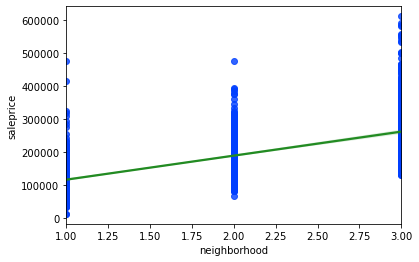

In [332]:
# Visually evaluate relationship between sale price and neighborhood after ranking system
sns.regplot(x=df_old.neighborhood,y=df_old.saleprice, line_kws = {'color':'forestgreen'});
plt.style.use('seaborn-colorblind')
# plt.savefig('neighborhood-and-saleprice2.png')

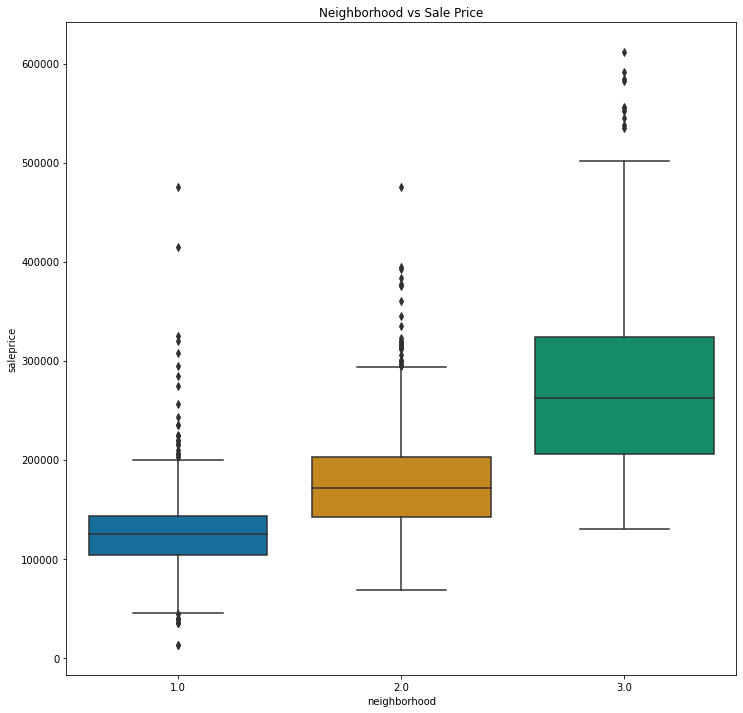

In [333]:
# Visually evaluate relationship between sale price and neighborhood after ranking system; evaluate outliers
plt.figure(figsize=(12,12));
sns.boxplot(data=df_old, x='neighborhood', y='saleprice', palette='colorblind');
plt.title('Neighborhood vs Sale Price');
# Save visualization as .png
# plt.savefig('neighborhood-and-saleprice.png')

In [334]:
# Evaluate outliers
df_old[df_old['saleprice'] < 600_000].saleprice.describe()

count      2050.000000
mean     181259.854146
std       78706.029683
min       12789.000000
25%      129812.500000
50%      162500.000000
75%      214000.000000
max      591587.000000
Name: saleprice, dtype: float64

In [335]:
# Evaluate outliers
df_old[df_old['saleprice'] < 500_000].saleprice.describe()

count      2038.000000
mean     179116.767419
std       73759.679051
min       12789.000000
25%      129500.000000
50%      161500.000000
75%      213000.000000
max      485000.000000
Name: saleprice, dtype: float64

In [336]:
# Decided not to remove outliers at this time as they could represent additional information

### Categorical Features
> Decided to convert all categorical/ordinal features that had obvious ranking systems


In [337]:
# set up ordinal dictionary:
ordinal_dct = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    'NA':0,
    0   :0
}
# Set up street and alley dictionary
street_dct = {
    'Pave':2,
    'Grvl':1,
    'NA':0
}
# Set up misc feature dictionary
misc_feature_dct = {
    'Elev':1,
    'Gar2':1,
    'Othr':1,
    'Shed':1,
    'TenC':1,
    'NA'  :0
}
# Set up fence dictionary
fence_dct = {
   'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1,
    'NA'  :0
}
# Set up paved drive & central air dictionary                
paved_drive_dct = {
    'Y':2,
    'P':1,
    'N':0
}
# Central air dictionary
cent_air_dct = {
    'Y':1,
    'N':0
}
# Set up garage finish dictionary
garage_finish_dct = {
    'Fin':3,
    'RFn':2,
    'Unf':1,
    'NA' :0
}
# Set up garage type dictionary
garage_type_dct = {
    'Attchd':1,
    'Basment':1,
    'BuiltIn':1,
    'CarPort':1,
    'Detchd':1,
    '2Types':1,
    'NA'    :0
}
# Set up house functionality dictionary  
func_dct = {
    'Typ':2,
    'Min1':1,
    'Min2':1,
    'Mod':0,
    'Maj1':0,
    'Maj2':0,
    'Sev':0,
    'Sal':0
}
# Set up Basement finish type 1&2 dictionary
bmt_fin_type_dct = {
    'GLQ':5,
    'ALQ':4,
    'BLQ':3,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    'NA':0
}
# Set up basement erxposure dictionary
bmt_exposure_dct = {
    'Gd':4,
    'Av':3,
    'Mn':2,
    'No':1,
    'NA':0 
}
# Set up lot shape dictionary
lot_shape_dct = {
    'Reg':3,
    'IR1':2,
    'IR2':1,
    'IR3':0    
}
# Set up land contour dictionary
land_cont_dct = {
    'Lvl':1,
    'Bnk':0,
    'HLS':0,
    'Low':0
}
# Set up utilities dictionary
util_dct = {
    'AllPub':1,
    'NoSewr':0,
    'NoSeWa':0
}
# Set up lot configuration dictionary        
lot_config_dct = {
    'Inside':1,
    'Corner':2,
    'CulDSac':3,
    'FR2':2,
    'FR3':3
}        
# Set up condition 1 and 2 dictionary        
cond_dct = {
    'Artery':1,
    'Feedr':2,
    'Norm':2,
    'PRNn':0,
    'RRAn':0,
    'PosN':2,
    'PosA':3,
    'RRNe':0,
    'RRAe':0
}
# Set up building type dictionary
bldg_type_dct = {
     '1Fam':2,
    '2fmCon':3,
    'Duplex':1,
    'TwnhsE':2,
    'Twnhs':1
}

# Dictionary for house style
house_style_dct = {
    '1Story':1,
    '1.5Fin':2,
    '1.5Unf':1.5,
    '2Story':2,
    '2.5Fin':3,
    '2.5Unf':2.5,
    'SFoyer':1.5,
    'SLvl':1.5
}
# Set up sale type dictionary
sale_type_dct = {
    'WD':2,
    'CWD':2,
    'VWD':2,
    'New':3,
    'COD':1,
    'Con':1,
    'ConLw':0,
    'ConLw':0,
    'ConLI':0,
    'ConLD':0,
    'Oth':0,
    0:0
}
# Dictionary for alley
alley_dct = {
    'Grvl':1,
    'Pave':1,
    'NA':0
}
# Dictionary for land slope
landslope_dct = {
    'Gtl': 1,
    'Mod': 0,
    'Sev': 0,
}
# Dictionary fo rmasonry veneer type
masvnr_dct = {
    'None':0,
    'BrkFace':1,
    'Stone':1,
    'BrkCmn':1
}
# dictionary for sale type
sale_type_dct = {
    'WD ':2,
    'CWD':2,
    'VWD':2,
    'New':3,
    'COD':1,
    'Con':1,
    'ConLw':0,
    'ConLw':0,
    'ConLI':0,
    'ConLD':0,
    'Oth':0
}

In [338]:
# Replaced categorical data with numerical data based off of ranking system using map and dictionary created above
df_old.sale_type = df_old.sale_type.map(sale_type_dct)

In [339]:
# Check to make sure all values were replace and no null values
print(f'{df_old.sale_type.isnull().sum()}\n {df_old.sale_type.value_counts(normalize=True)}')

0
 2    0.873233
3    0.078011
1    0.032667
0    0.016090
Name: sale_type, dtype: float64


In [340]:
df_old.bldg_type.value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

In [341]:
df_old.bldg_type = df_old.bldg_type.map(bldg_type_dct)

In [342]:
print(f'{df_old.bldg_type.isnull().sum()}\n {df_old.bldg_type.value_counts(normalize=True)}')

0
 2    0.907362
1    0.070210
3    0.022428
Name: bldg_type, dtype: float64


In [343]:
df_old.condition_1.value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [344]:
df_old['condition_1'] = df_old['condition_1'].map(cond_dct)

In [345]:
print(f'{df_old.sale_type.isnull().sum()}\n {df_old.sale_type.value_counts(normalize=True)}')

0
 2    0.873233
3    0.078011
1    0.032667
0    0.016090
Name: sale_type, dtype: float64


In [346]:
df_old.condition_2.value_counts()

Norm      2025
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: condition_2, dtype: int64

In [347]:
df_old['condition_2'] = df_old['condition_2'].map(cond_dct)

In [348]:
print(f'{df_old.sale_type.isnull().sum()}\n {df_old.sale_type.value_counts(normalize=True)}')

0
 2    0.873233
3    0.078011
1    0.032667
0    0.016090
Name: sale_type, dtype: float64


In [349]:
df_old.lot_config.value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

In [350]:
df_old['lot_config'] = df_old['lot_config'].map(lot_config_dct)

In [351]:
print(f'{df_old.lot_config.isnull().sum()}\n {df_old.lot_config.value_counts(normalize=True)}')

0
 1    0.732813
2    0.198927
3    0.068259
Name: lot_config, dtype: float64


In [352]:
df_old['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [353]:
df_old['lot_shape'] = df_old['lot_shape'].map(lot_shape_dct)

In [354]:
print(f'{df_old.lot_shape.isnull().sum()}\n {df_old.lot_shape.value_counts(normalize=True)}')

0
 3    0.631399
2    0.337396
1    0.026816
0    0.004388
Name: lot_shape, dtype: float64


In [355]:
df_old['utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [356]:
df_old['utilities'] = df_old['utilities'].map(util_dct)

In [357]:
print(f'{df_old.utilities.isnull().sum()}\n {df_old.utilities.value_counts(normalize=True)}')

0
 1    0.999025
0    0.000975
Name: utilities, dtype: float64


In [358]:
df_old.land_contour.value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

In [359]:
df_old['land_contour'] = df_old['land_contour'].map(land_cont_dct)

In [360]:
print(f'{df_old.land_contour.isnull().sum()}\n {df_old.land_contour.value_counts(normalize=True)}')

0
 1    0.898586
0    0.101414
Name: land_contour, dtype: float64


In [361]:
df_old['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
NA      58
Name: bsmt_exposure, dtype: int64

In [362]:
df_old['bsmt_exposure'] = df_old['bsmt_exposure'].map(bmt_exposure_dct)

In [363]:
print(f'{df_old.bsmt_exposure.isnull().sum()}\n {df_old.bsmt_exposure.value_counts(normalize=True)}')

0
 1    0.652852
3    0.140419
4    0.098976
2    0.079473
0    0.028279
Name: bsmt_exposure, dtype: float64


In [364]:
df_old['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      55
Name: bsmtfin_type_1, dtype: int64

In [365]:
df_old['bsmtfin_type_1'] = df_old['bsmtfin_type_1'].map(bmt_fin_type_dct)

In [366]:
print(f'{df_old.bsmtfin_sf_1.isnull().sum()}\n {df_old.bsmtfin_sf_1.value_counts(normalize=True)}')

0
 0.0       0.320819
24.0      0.008289
16.0      0.004876
20.0      0.003413
384.0     0.003413
            ...   
718.0     0.000488
900.0     0.000488
918.0     0.000488
1619.0    0.000488
1159.0    0.000488
Name: bsmtfin_sf_1, Length: 821, dtype: float64


In [367]:
df_old['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
NA       56
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [368]:
df_old['bsmtfin_type_2'] = df_old['bsmtfin_type_2'].map(bmt_fin_type_dct)

In [369]:
print(f'{df_old.bsmtfin_sf_2.isnull().sum()}\n {df_old.bsmtfin_sf_2.value_counts(normalize=True)}')

0
 0.0       0.879571
294.0     0.002438
539.0     0.001463
72.0      0.001463
180.0     0.001463
            ...   
232.0     0.000488
1393.0    0.000488
95.0      0.000488
351.0     0.000488
120.0     0.000488
Name: bsmtfin_sf_2, Length: 205, dtype: float64


In [370]:
df_old.functional.value_counts()

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: functional, dtype: int64

In [371]:
df_old['functional'] = df_old['functional'].map(func_dct)

In [372]:
print(f'{df_old.functional.isnull().sum()}\n {df_old.functional.value_counts(normalize=True)}')

0
 2    0.933691
1    0.040956
0    0.025353
Name: functional, dtype: float64


In [373]:
df_old.garage_type.value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [374]:
df_old['garage_type'] = df_old['garage_type'].map(garage_type_dct)

In [375]:
print(f'{df_old.garage_type.isnull().sum()}\n {df_old.garage_type.value_counts(normalize=True)}')

0
 1    0.944905
0    0.055095
Name: garage_type, dtype: float64


In [376]:
df_old['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
NA     114
Name: garage_finish, dtype: int64

In [377]:
df_old['garage_finish'] = df_old['garage_finish'].map(garage_finish_dct)

In [378]:
print(f'{df_old.garage_finish.isnull().sum()}\n {df_old.garage_finish.value_counts(normalize=True)}')

0
 1    0.413944
2    0.282301
3    0.248172
0    0.055583
Name: garage_finish, dtype: float64


In [379]:
df_old['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [380]:
df_old['paved_drive'] = df_old['paved_drive'].map(paved_drive_dct)

In [381]:
print(f'{df_old.paved_drive.isnull().sum()}\n {df_old.paved_drive.value_counts(normalize=True)}')

0
 2    0.907362
0    0.073623
1    0.019015
Name: paved_drive, dtype: float64


In [382]:
df_old['fence'].value_counts()

NA       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [383]:
df_old['fence'] = df_old['fence'].map(fence_dct)

In [384]:
print(f'{df_old.fence.isnull().sum()}\n {df_old.fence.value_counts(normalize=True)}')

0
 0    0.804973
3    0.110678
4    0.040468
2    0.039005
1    0.004876
Name: fence, dtype: float64


In [385]:
df_old['misc_feature'].value_counts()

NA      1986
Shed      56
Gar2       4
Othr       3
Elev       1
TenC       1
Name: misc_feature, dtype: int64

In [386]:
df_old['misc_feature'] = df_old['misc_feature'].map(misc_feature_dct)

In [387]:
print(f'{df_old.misc_feature.isnull().sum()}\n {df_old.misc_feature.value_counts(normalize=True)}')

0
 0    0.968308
1    0.031692
Name: misc_feature, dtype: float64


In [388]:
df_old['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

In [389]:
df_old['street'] = df_old['street'].map(street_dct)

In [390]:
print(f'{df_old.street.isnull().sum()}\n {df_old.street.value_counts(normalize=True)}')

0
 2    0.996587
1    0.003413
Name: street, dtype: float64


In [391]:
df_old['central_air'].value_counts()

Y    1910
N     141
Name: central_air, dtype: int64

In [392]:
df_old['central_air'] = df_old['central_air'].map(cent_air_dct)

In [393]:
print(f'{df_old.central_air.isnull().sum()}\n {df_old.central_air.value_counts(normalize=True)}')

0
 1    0.931253
0    0.068747
Name: central_air, dtype: float64


In [394]:
df_old['alley'].value_counts()

NA      1911
Grvl      85
Pave      55
Name: alley, dtype: int64

In [395]:
df_old['alley'] = df_old['alley'].map(alley_dct)

In [396]:
print(f'{df_old.alley.isnull().sum()}\n {df_old.alley.value_counts(normalize=True)}')

0
 0    0.931741
1    0.068259
Name: alley, dtype: float64


In [397]:
df_old['land_slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [398]:
df_old['land_slope'] = df_old['land_slope'].map(landslope_dct)

In [399]:
print(f'{df_old.alley.isnull().sum()}\n {df_old.alley.value_counts(normalize=True)}')

0
 0    0.931741
1    0.068259
Name: alley, dtype: float64


In [400]:
# Loop through all categorical/ordinal columns/features that had the same value counts
for key,value in df_old.items():
    if 'Ex' and 'Gd' and 'TA' and 'Fa' and 'Po' and 'NA' in value.value_counts():
        df_old[key] = df_old[key].map(ordinal_dct)

In [401]:
df_old.kitchen_qual = df_old.kitchen_qual.map(ordinal_dct)

In [402]:
print(f'{df_old.kitchen_qual.isnull().sum()}\n {df_old.kitchen_qual.value_counts(normalize=True)}')

0
 3    0.510483
4    0.392979
5    0.073623
2    0.022916
Name: kitchen_qual, dtype: float64


In [403]:
df_old.exter_qual.value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64

In [404]:
df_old.exter_qual = df_old.exter_qual.map(ordinal_dct)

In [405]:
print(f'{df_old.exter_qual.isnull().sum()}\n {df_old.exter_qual.value_counts(normalize=True)}')

0
 3    0.607996
4    0.339834
5    0.039493
2    0.012677
Name: exter_qual, dtype: float64


In [406]:
df_old.exter_cond = df_old.exter_cond.map(ordinal_dct)

In [407]:
print(f'{df_old.exter_cond.isnull().sum()}\n {df_old.exter_cond.value_counts(normalize=True)}')

0
 3    0.866894
4    0.104827
2    0.023891
5    0.003413
1    0.000975
Name: exter_cond, dtype: float64


In [408]:
df_old.mas_vnr_type.value_counts()

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [409]:
df_old.mas_vnr_type = df_old.mas_vnr_type.map(masvnr_dct)

In [410]:
print(f'{df_old.mas_vnr_type.isnull().sum()}\n {df_old.mas_vnr_type.value_counts(normalize=True)}')

0
 0    0.604583
1    0.395417
Name: mas_vnr_type, dtype: float64


In [411]:
df_old.ms_zoning.value_counts(normalize=True)

RL         0.779132
RM         0.154071
FV         0.049244
C (all)    0.009264
RH         0.006826
A (agr)    0.000975
I (all)    0.000488
Name: ms_zoning, dtype: float64

In [412]:
# Can convert general zoning classification sale as well
# dictionary for ms zone ranking system
ms_zone_dct = {
    'RL':1,
    'RM':1,
    'FV':1,
    'C (all)':0,
    'RH':1,
    'A (agr)':0,
    'I (all)':0
}

In [413]:
df_old['ms_zoning'] = df_old['ms_zoning'].map(ms_zone_dct)

In [414]:
print(f'{df_old.ms_zoning.isnull().sum()}\n {df_old.ms_zoning.value_counts(normalize=True)}')

0
 1    0.989274
0    0.010726
Name: ms_zoning, dtype: float64


In [417]:
# Re-evaluate for any null values, or categorical data missed that could be converted to numerical based off ranking system
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   int64  
 4   lot_frontage     2051 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   int64  
 7   alley            2051 non-null   int64  
 8   lot_shape        2051 non-null   int64  
 9   land_contour     2051 non-null   int64  
 10  utilities        2051 non-null   int64  
 11  lot_config       2051 non-null   int64  
 12  land_slope       2051 non-null   int64  
 13  neighborhood     2051 non-null   float64
 14  condition_1      2045 non-null   float64
 15  condition_2      2049 non-null   float64
 16  bldg_type        2051 non-null   int64  
 17  house_style   

In [419]:
# dummify remainder of categorical data - not easily rankable
df_old = pd.get_dummies(data=df_old, columns=['electrical', 'heating', 'foundation', 'exterior_1st', 'exterior_2nd', 'roof_style', 'roof_matl', 'house_style' ], drop_first=True)

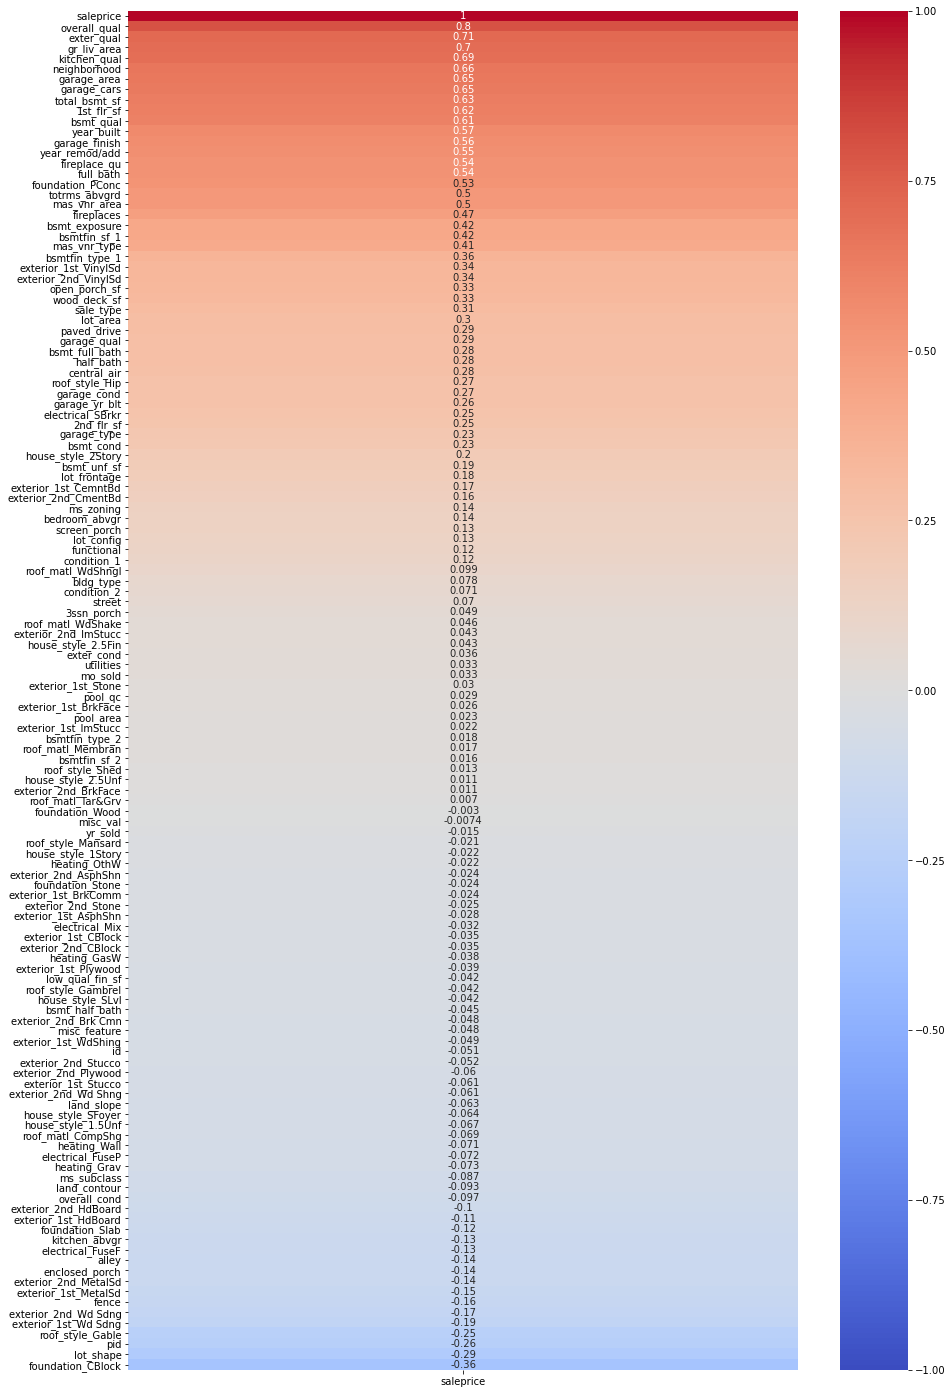

In [420]:
# Heat map of all data that is now converted to numerical data
plt.style.use('seaborn-bright')
fig, ax = plt.subplots(figsize=(15, 25))
plt.fontsize = 27
sns.heatmap(df_old.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);

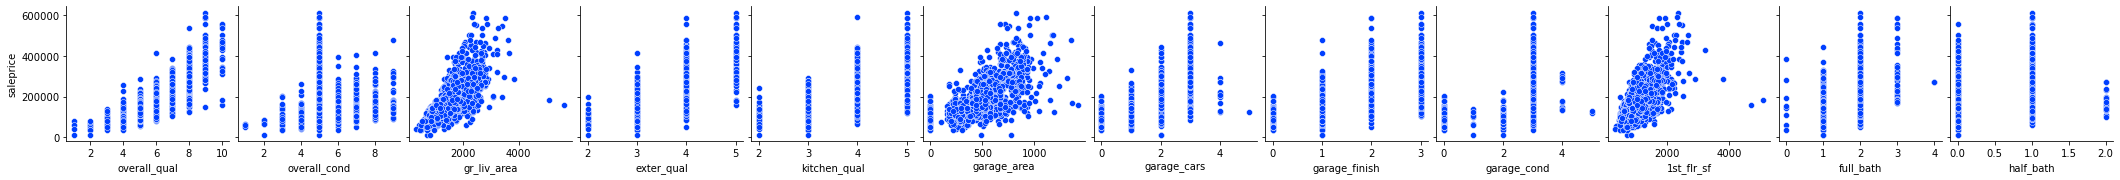

In [421]:
# Create pair plot for features highly correlated with sale price for further evaluation of relationship
sns.pairplot(data=df_old, x_vars=
        ['overall_qual', 
        'overall_cond',
        'gr_liv_area',
        'exter_qual',
        'kitchen_qual',
        'garage_area',
        'garage_cars',
        'garage_finish',
         'garage_cond',
        '1st_flr_sf',  
        'full_bath',
        'half_bath'],
        y_vars= ['saleprice']);

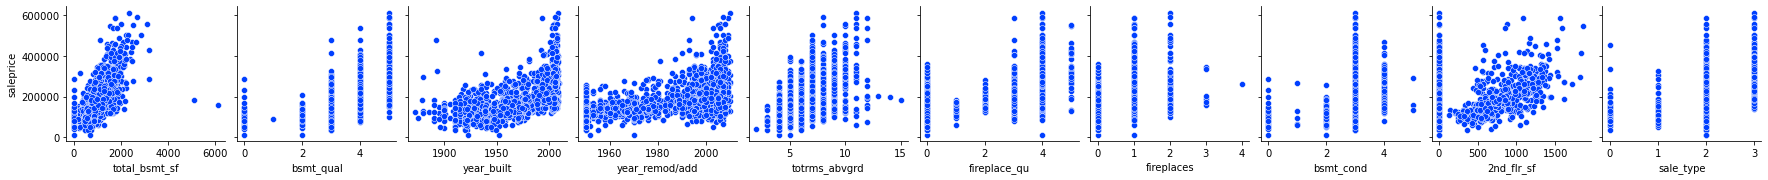

In [422]:
# Create pair plot for features highly correlated with sale price for further evaluation of relationship
sns.pairplot(data=df_old, x_vars=
        ['total_bsmt_sf', 
        'bsmt_qual',
        'year_built',
        'year_remod/add',
        'totrms_abvgrd',
        'fireplace_qu',
        'fireplaces',
        'bsmt_cond',  
        '2nd_flr_sf',
        'sale_type'],
        y_vars= ['saleprice']);

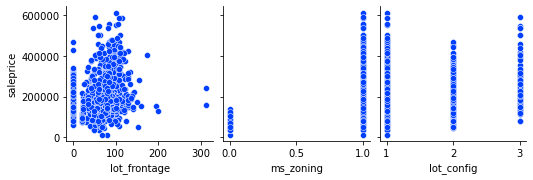

In [423]:
# Create pair plot to compare lot configuration, zoning classification, and lot configuration with sale price
sns.pairplot(data=df_old, x_vars = ['lot_frontage', 'ms_zoning', 'lot_config'], y_vars = ['saleprice']);

In [424]:
# Save cleaned dataframe to csv
df_old.to_csv('datasets/df_train.csv',index=False)

## Data Visualization for Feature Engineering

In [426]:
df_old['social_area_qual'] = df_old['gr_liv_area'] * df_old['kitchen_qual'] 

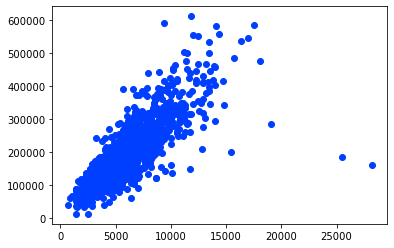

In [427]:
plt.scatter(df_old['social_area_qual'],df_old['saleprice']);

In [431]:
df_old['abv_rooms'] = df_old['totrms_abvgrd'] * df_old['bedroom_abvgr'] * df_old['2nd_flr_sf']

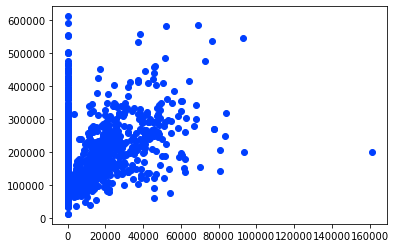

In [432]:
plt.scatter(df_old['abv_rooms'],df_old['saleprice']);

In [433]:
df_old['all_fireplace'] = df_old['fireplace_qu']*df_old['fireplaces']

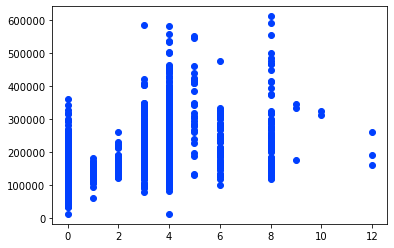

In [434]:
plt.scatter(df_old['all_fireplace'],df_old['saleprice']);

In [435]:
df_old['total_bath'] = df_old['full_bath'] + df_old['half_bath']

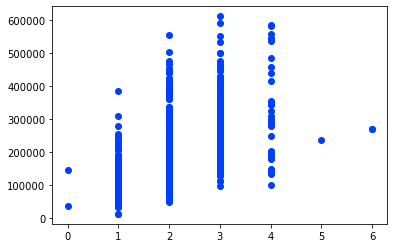

In [436]:
plt.scatter(df_old['total_bath'], df_old['saleprice']);

In [437]:
df_old['garage_area_cars']=df_old['garage_area'] * df_old['garage_cars']

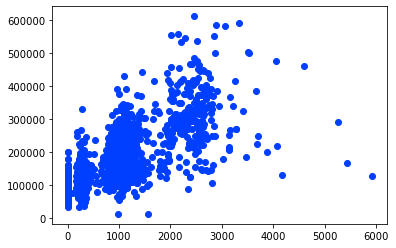

In [438]:
plt.scatter(df_old['garage_area_cars'] ,df_old.saleprice);

In [439]:
df_old['total_garage_qual'] = df_old['garage_cond'] * df_old['garage_finish'] * df_old['garage_qual'] * df_old['garage_area']

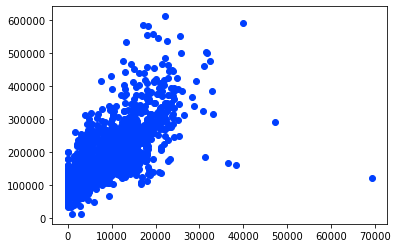

In [440]:
plt.scatter(df_old.total_garage_qual, df_old.saleprice);

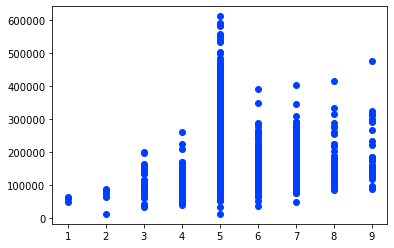

In [441]:
plt.scatter(df_old['overall_cond'], df_old['saleprice']);

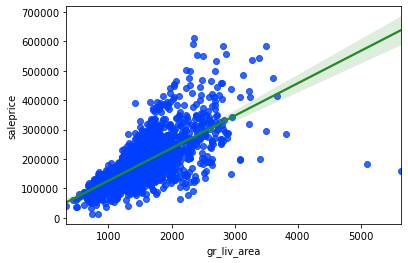

In [442]:
sns.regplot(x=df_old.gr_liv_area,y=df_old.saleprice, line_kws = {'color':'forestgreen'});
plt.style.use('seaborn-colorblind')
# Save figure as .png
plt.savefig('GrLiveArea-and-saleprice2.png')

In [443]:
df_old['total_bsmt_qual'] = df_old['bsmt_qual'] * df_old['bsmt_cond'] * df_old['total_bsmt_sf']

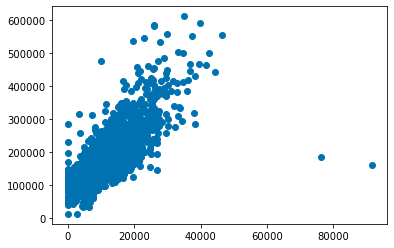

In [444]:
plt.scatter(df_old.total_bsmt_qual, df_old.saleprice);

In [445]:
df_old['bsmt_expos_qual'] = df_old['bsmt_exposure'] * df_old['total_bsmt_sf']

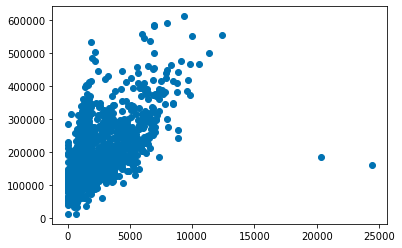

In [446]:
plt.scatter(df_old.bsmt_expos_qual, df_old.saleprice);

In [447]:
df_old['bsmt_totl_withbath'] = df_old['bsmt_full_bath'] + df_old['bsmt_half_bath']

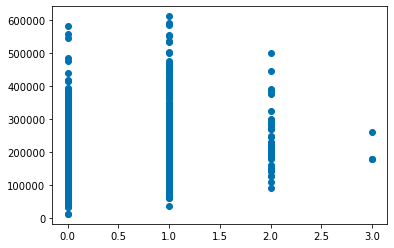

In [448]:
plt.scatter(df_old.bsmt_totl_withbath, df_old.saleprice);

In [451]:
df_old['kitchen'] = df_old['kitchen_abvgr'] + df_old['kitchen_qual']

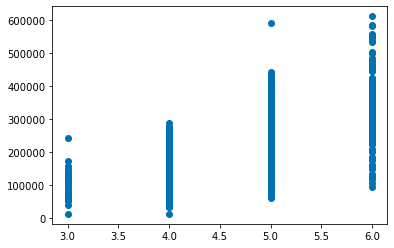

In [452]:
plt.scatter(df_old.kitchen, df_old.saleprice);

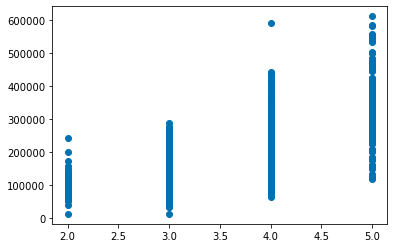

In [453]:
plt.scatter(df_old.kitchen_qual,df_old.saleprice);

In [454]:
df_old['total_mas_vnr'] = df_old['mas_vnr_area'] * df_old['mas_vnr_type']

In [455]:
df_old = df_old[(df_old['total_mas_vnr'] > 0)&(df_old['total_mas_vnr'] < 1000)]

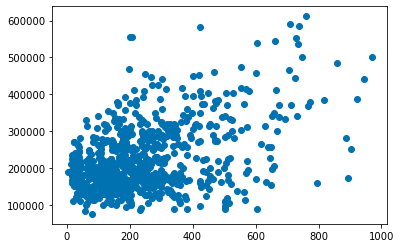

In [456]:
plt.scatter(df_old.total_mas_vnr, df_old.saleprice);

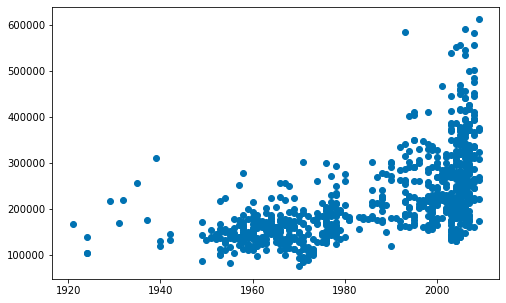

In [461]:
# plot year built vs sale price
plt.figure(figsize=(8,5))
plt.scatter(df_old.year_built, df_old.saleprice);